In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
from kagglehub import KaggleDatasetAdapter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loads dataset directly from Kaggle without needing to download csv file
file_path = "Admission_Predict_Ver1.1.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
  file_path,
)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'}) #extra space in target column name, needed fixing

print(df.describe().T)

                   count       mean         std     min       25%     50%  \
Serial No.         500.0  250.50000  144.481833    1.00  125.7500  250.50   
GRE Score          500.0  316.47200   11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200    6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400    1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400    0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400    0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644    0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000    0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174    0.141140    0.34    0.6300    0.72   

                      75%     max  
Serial No.         375.25  500.00  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR          

The describe function gives some insight into the statistics of the dataframe, such as the center and spread of each column.

In [ ]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


No null values in dataframe, so data imputation is not needed.

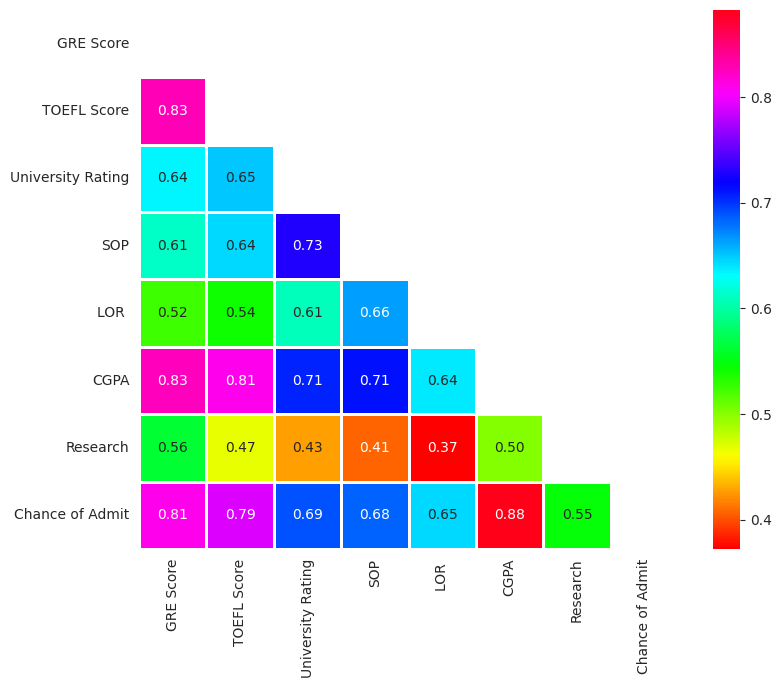

In [ ]:
#creating a heatmap that depicts correlation among variables
cols=df.drop(labels='Serial No.',axis=1)
corr = cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

###EDA: Correlation
The correlation heatmap provides a clear overview of the linear relationships between the input features and the target variable, Chance of Admit.

Notably, **CGPA** shows the strongest positive correlation with the target, **Chance of Admit** (0.88), indicating it could be the most influential factor in predicting graduate admissions.

**GRE** and **TOEFL** scores also show strong positive correlations , suggesting that academic test scores are significant predictors of admission likelihood.

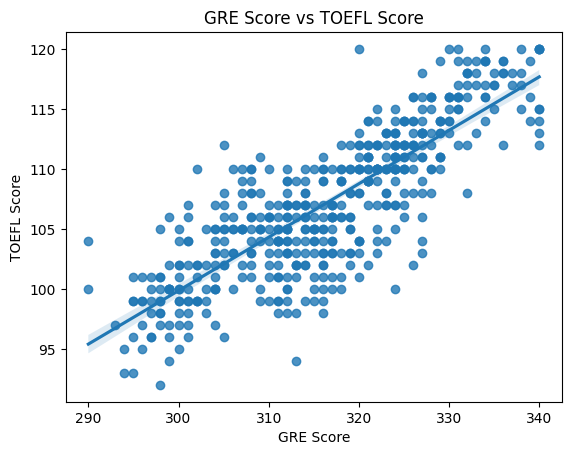

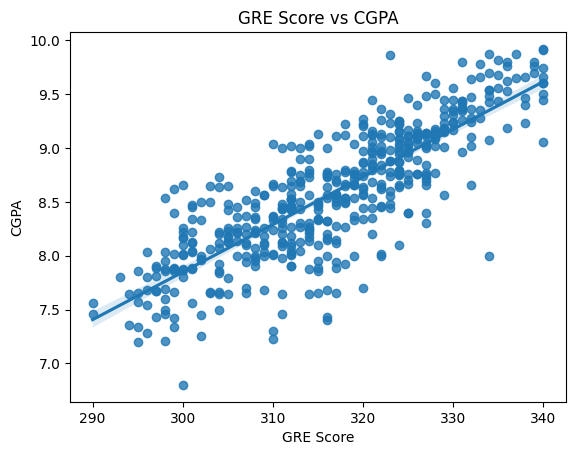

In [ ]:
#generates scatterplot that compares GRE and TOEFL with a regression line
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

#generates scatterplot that compares GRE and CGPA with a regression line
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()


### EDA: Correlation (Cont.)
The scatterplot of GRE Score vs TOEFL Score reveals a positive linear correlation between the two variables. This suggests that students who perform well on the GRE also tend to score highly on the TOEFL. Because both of these tests include a verbal section (which tests verbal reasoning, vocabulary, and comprehension), it is understandable that outcomes of both tests are similar.

The GRE Score vs CGPA scatterplot also shows a moderate positive correlation, implying that students with higher undergraduate GPAs are more likely to achieve higher GRE scores. This supports the assumption that strong academic performance in undergraduate studies tends to align with high performance on graduate entrance exams.

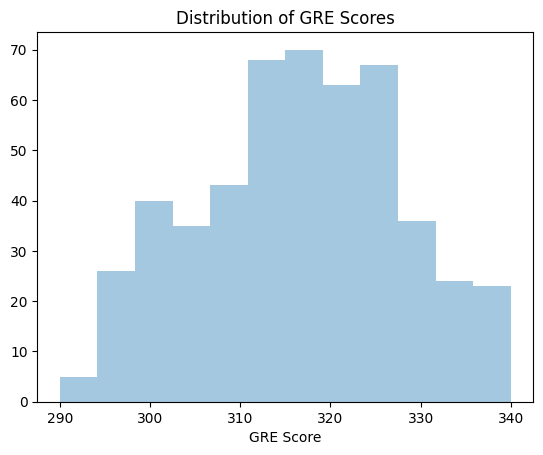

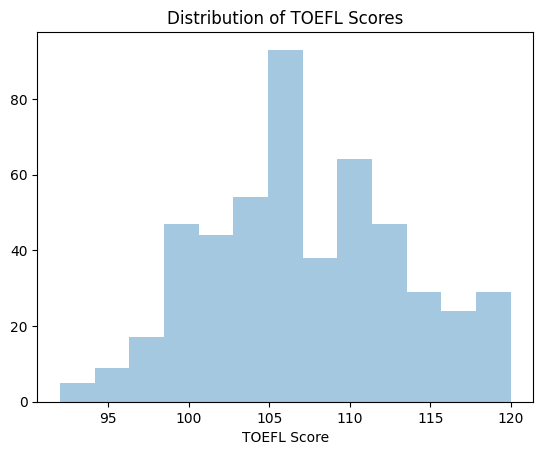

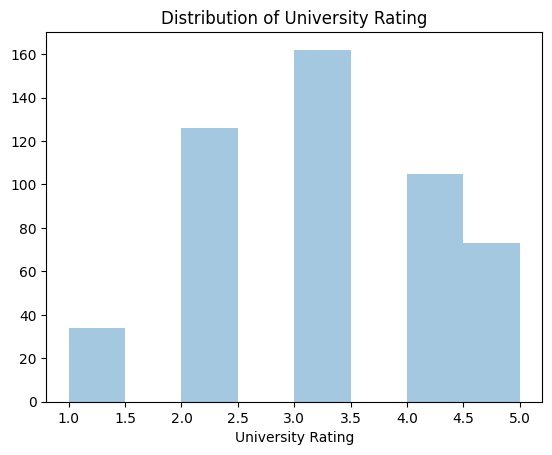

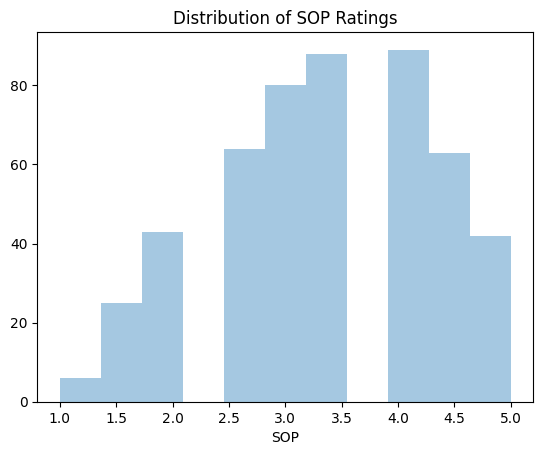

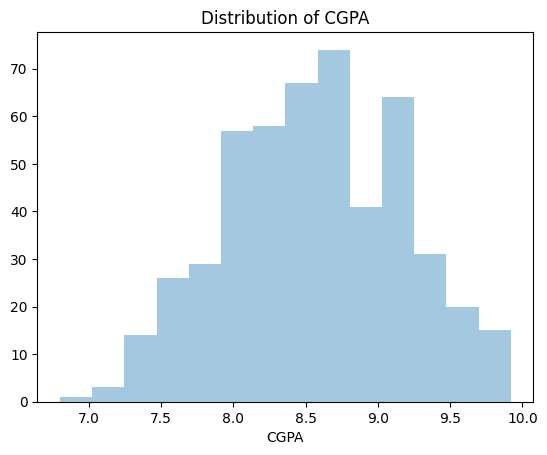

In [ ]:
#five histograms that depict distributions of specific feature variables
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

### EDA: Distributions
The distribution plots for the numerical and categorical features offer insight into the underlying structure of the dataset. The GRE and TOEFL score distributions are roughly normal, with GRE scores clustering around **320** and TOEFL scores around **105**. This could suggest a limited spread in academic aptitude among candidates, which may affect how strongly these variables drive variation in admissions chances.

These histograms depict that most students in the dataset appear to have strong and fairly similar academic profiles, which points to how the model may be best suited for fine-grained distinctions between already strong candidates.



In [ ]:
# feature and target variables assigned to X and y
X=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']

In [ ]:
#Normalization works slightly better for Regression.
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=42)

### Normalization

Normalization scales all features to the same range, preventing any single feature with a larger numerical range (like CGPA or GRE) from dominating the regression model's learning process.

When features are on the same scale, the magnitude of coefficients in linear regression becomes more directly comparable, which helps with feature importance analysis

Additionally, regression algorithms that involve gradient descent perform better on normalized data.



Although only the evaluation metrics (RMSE, MAE, R^2) are shown for each model here, next cell displays the results in bar chart form.

Results:

Linear Regression
  RMSE: 0.0779
  MAE: 0.0593
  R²: 0.7030

Decision Tree
  RMSE: 0.1013
  MAE: 0.0739
  R²: 0.4981

Random Forest
  RMSE: 0.0698
  MAE: 0.0499
  R²: 0.7618

Gradient Boosting
  RMSE: 0.0743
  MAE: 0.0536
  R²: 0.7304

Ada Boosting
  RMSE: 0.0764
  MAE: 0.0610
  R²: 0.7149

Extra Trees
  RMSE: 0.0649
  MAE: 0.0478
  R²: 0.7943

K-Neighbors
  RMSE: 0.0868
  MAE: 0.0697
  R²: 0.6315

Support Vector
  RMSE: 0.1282
  MAE: 0.1037
  R²: 0.1963



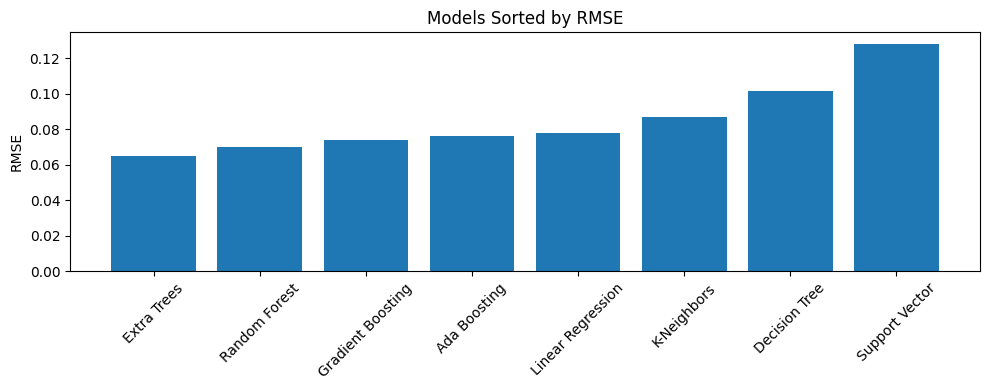

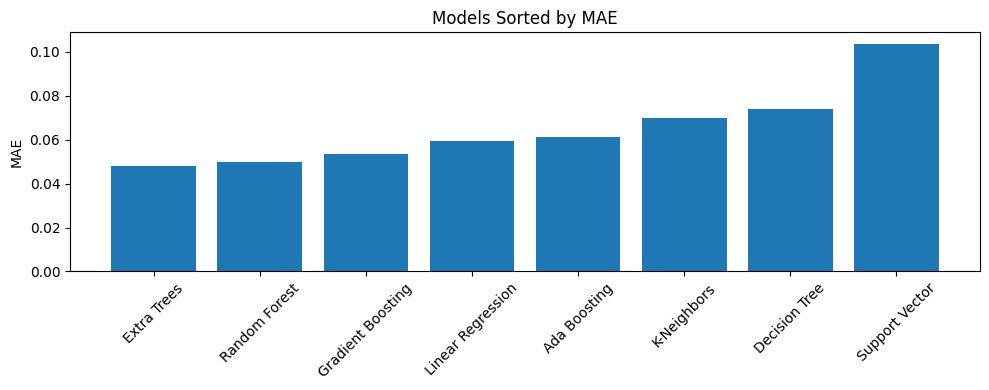

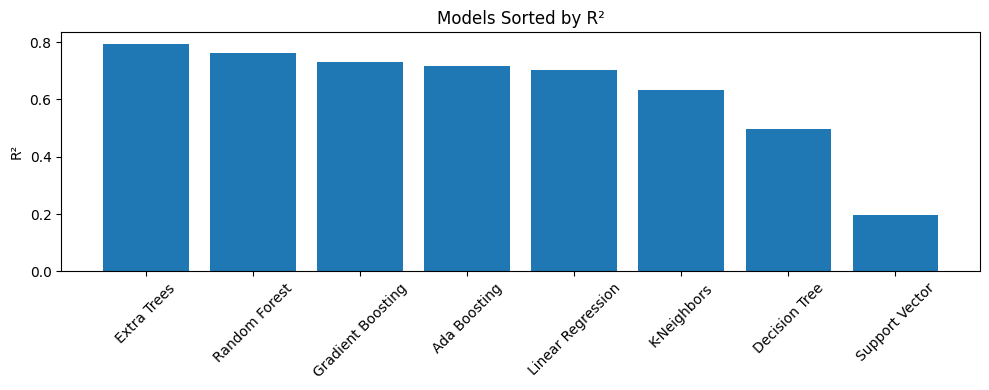

In [ ]:
# List of different regression models along with their display names
regressors = [
    ['Linear Regression', LinearRegression()],
    ['Decision Tree', DecisionTreeRegressor()],
    ['Random Forest', RandomForestRegressor()],
    ['Gradient Boosting', GradientBoostingRegressor()],
    ['Ada Boosting', AdaBoostRegressor()],
    ['Extra Trees', ExtraTreesRegressor()],
    ['K-Neighbors', KNeighborsRegressor()],
    ['Support Vector', SVR()]
]

# To store the evaluation metrics for each model
results = []

print('Results:\n')

# Single loop: fit, predict, print metrics, store metrics
for name, model in regressors:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # Print results
    print(f"{name}\n  RMSE: {rmse:.4f}\n  MAE: {mae:.4f}\n  R²: {r2:.4f}\n")

    # Store for visualization
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Convert to DataFrame
df_metrics = pd.DataFrame(results)

# RMSE (lower is better)
df_rmse = df_metrics.sort_values(by="RMSE")
plt.figure(figsize=(10, 4))
plt.bar(df_rmse["Model"], df_rmse["RMSE"])
plt.xticks(rotation=45)
plt.title("Models Sorted by RMSE")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# MAE (lower is better)
df_mae = df_metrics.sort_values(by="MAE")
plt.figure(figsize=(10, 4))
plt.bar(df_mae["Model"], df_mae["MAE"])
plt.xticks(rotation=45)
plt.title("Models Sorted by MAE")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

# R² (higher is better)
df_r2 = df_metrics.sort_values(by="R²", ascending=False)
plt.figure(figsize=(10, 4))
plt.bar(df_r2["Model"], df_r2["R²"])
plt.xticks(rotation=45)
plt.title("Models Sorted by R²")
plt.ylabel("R²")
plt.tight_layout()
plt.show()

Now in a sorted bar chart form, we can clearly determine that extra trees regressor outperforms all other models, due to its ability to handle non-linear relationships.

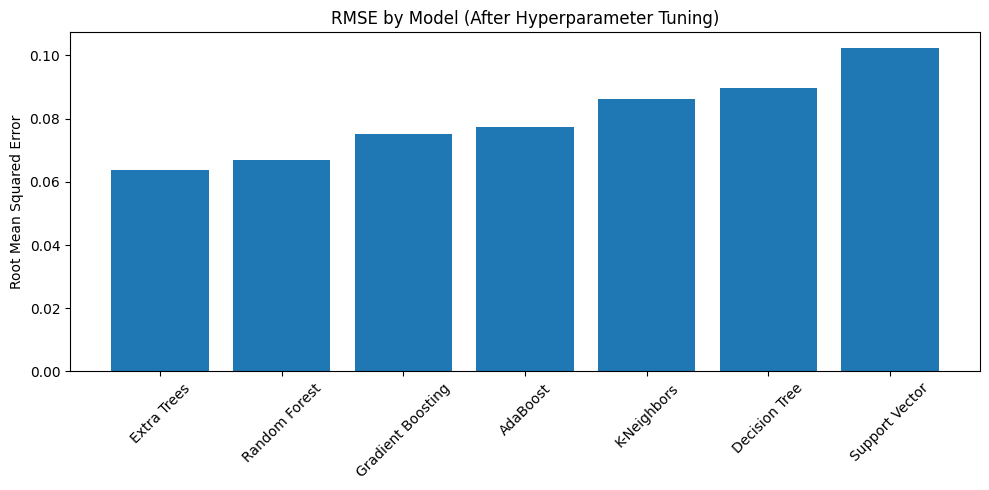

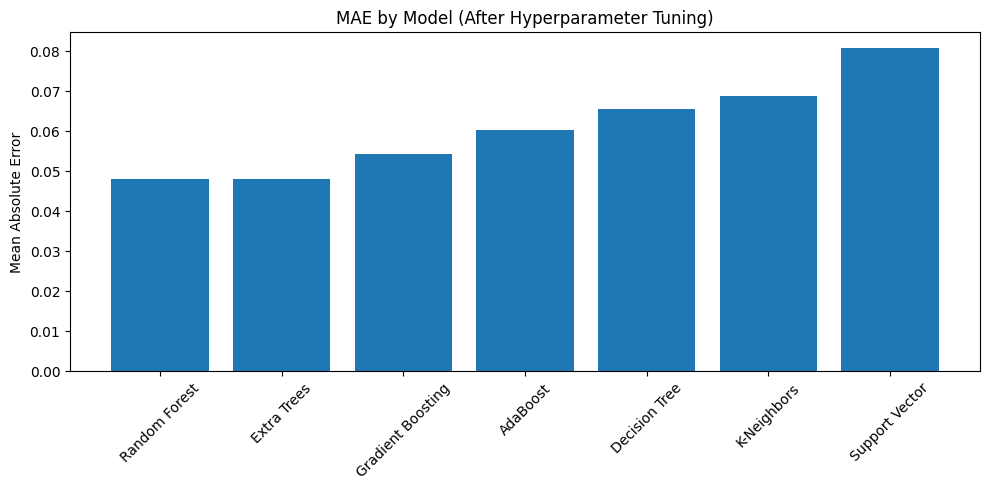

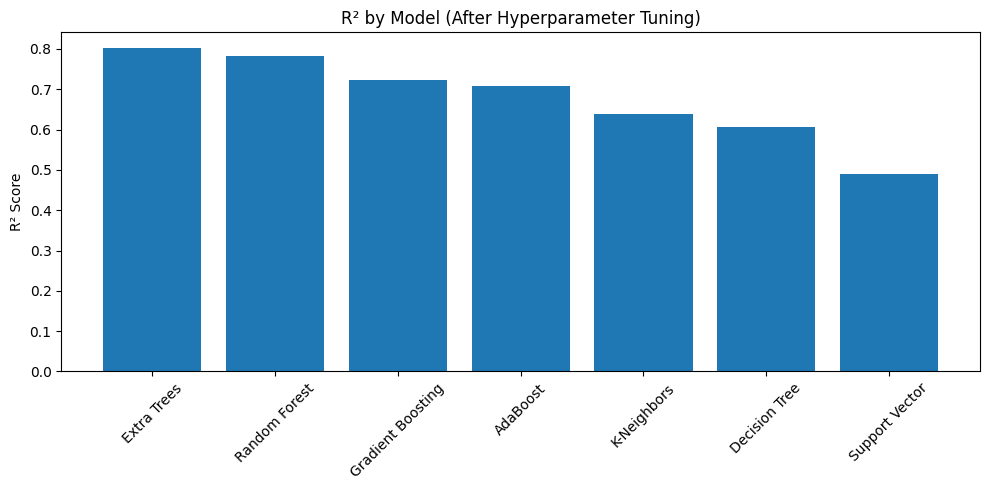

            Model                                                                             Best Params
    Decision Tree                                            {'min_samples_split': 10, 'max_depth': None}
    Random Forest {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Gradient Boosting                             {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
         AdaBoost                                             {'n_estimators': 100, 'learning_rate': 1.0}
      Extra Trees   {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
      K-Neighbors                                               {'weights': 'distance', 'n_neighbors': 5}
   Support Vector                                            {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [ ]:
# Define models and hyperparameter grids
models_and_parameters = {
    'Decision Tree': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'AdaBoost': (AdaBoostRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    'Extra Trees': (ExtraTreesRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'K-Neighbors': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
    'Support Vector': (SVR(), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    })
}

# Evaluate all models after tuning
results = []
for name, (model, params) in models_and_parameters.items():
    search = RandomizedSearchCV(model, params, n_iter=10, scoring='neg_mean_squared_error',
                                cv=5, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    preds = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "Best Params": search.best_params_,
        "RMSE": round(rmse, 4),
        "MAE": round(mae, 4),
        "R²": round(r2, 4)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plotting RMSE, MAE, and R² (sorted)
import matplotlib.pyplot as plt

# RMSE
df_rmse = results_df.sort_values(by="RMSE", ascending=True)
plt.figure(figsize=(10, 5))
plt.bar(df_rmse["Model"], df_rmse["RMSE"])
plt.title("RMSE by Model (After Hyperparameter Tuning)")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MAE
df_mae = results_df.sort_values(by="MAE", ascending=True)
plt.figure(figsize=(10, 5))
plt.bar(df_mae["Model"], df_mae["MAE"])
plt.title("MAE by Model (After Hyperparameter Tuning)")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# R²
df_r2 = results_df.sort_values(by="R²", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_r2["Model"], df_r2["R²"])
plt.title("R² by Model (After Hyperparameter Tuning)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_params_df = results_df[["Model", "Best Params"]].copy()
best_params_df.reset_index(drop=True, inplace=True)
print(best_params_df.to_string(index=False))

In [ ]:
print(results_df[["Model", "R²", "RMSE", "MAE"]].sort_values(by="R²", ascending=False).to_string(index=False))

            Model     R²   RMSE    MAE
      Extra Trees 0.8011 0.0638 0.0481
    Random Forest 0.7820 0.0668 0.0480
Gradient Boosting 0.7237 0.0752 0.0543
         AdaBoost 0.7075 0.0773 0.0604
      K-Neighbors 0.6374 0.0861 0.0688
    Decision Tree 0.6075 0.0896 0.0657
   Support Vector 0.4890 0.1022 0.0807


### Hyperparameter Tuning
After applying **RandomizedSearchCV** with 5-fold cross-validation to a range of regression models, the Extra Trees Regressor emerged as the top performer. By tuning its number of estimators, tree depth, and minimum split thresholds, Extra Trees achieved the highest R² score, along with the lowest RMSE and MAE across all tested models. This confirms its ability to model complex, non-linear relationships and capture feature interactions effectively. Other models like Gradient Boosting and Random Forest also showed improved performance after tuning, narrowing the performance gap. These results demonstrate that hyperparameter tuning not only improves accuracy but also reveals which models are best suited to the structure and variability of the dataset.

In [ ]:
# Threshold to convert regression to binary classification, based on the target column average
threshold = 0.72174

# Models list (same order used earlier)
regressors = [
    ['Linear Regression', LinearRegression()],
    ['Decision Tree', DecisionTreeRegressor()],
    ['Random Forest', RandomForestRegressor()],
    ['Gradient Boosting', GradientBoostingRegressor()],
    ['Ada Boosting', AdaBoostRegressor()],
    ['Extra Trees', ExtraTreesRegressor()],
    ['K-Neighbors', KNeighborsRegressor()],
    ['Support Vector', SVR()]
]

# Store accuracy results
accuracy_results = []

for name, model in regressors:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Binarize predictions and true labels
    preds_bin = (preds >= threshold).astype(int)
    y_test_bin = (y_test >= threshold).astype(int)

    acc = accuracy_score(y_test_bin, preds_bin)
    accuracy_results.append((name, acc))

# Display results
print("Accuracy for all models (threshold = 0.72174):\n")
for name, acc in accuracy_results:
    print(f"{name:<25} Accuracy: {acc:.4f}")

Accuracy for all models (threshold = 0.72174):

Linear Regression         Accuracy: 0.8400
Decision Tree             Accuracy: 0.8100
Random Forest             Accuracy: 0.9200
Gradient Boosting         Accuracy: 0.8900
Ada Boosting              Accuracy: 0.8800
Extra Trees               Accuracy: 0.9000
K-Neighbors               Accuracy: 0.8100
Support Vector            Accuracy: 0.7400


###Model Performance Comparison Summary

The Extra Trees Regressor clearly outperformed all other models in terms of predictive accuracy, achieving the highest R² score and the lowest RMSE and MAE after hyperparameter tuning. Its ensemble-based structure allows it to capture complex, non-linear relationships between features (such as CGPA and Research), while averaging across many trees helps reduce overfitting and variance.

Gradient Boosting and Random Forest also performed strongly after tuning, showing that tree-based ensemble methods are especially effective for this dataset. Their ability to model feature importance and interactions contributed to improved generalization performance.

In contrast, models like Support Vector Regression and K-Neighbors Regression demonstrated higher prediction error and lower R² scores, suggesting they are less suited to the characteristics of this dataset. These models may struggle to capture the smooth, linear patterns exhibited in key features such as GRE, TOEFL, and CGPA.

Overall, the dataset’s strong linear trends allowed linear models to remain competitive, but tree-based ensemble methods ultimately provided the best balance of flexibility, accuracy, and robustness.

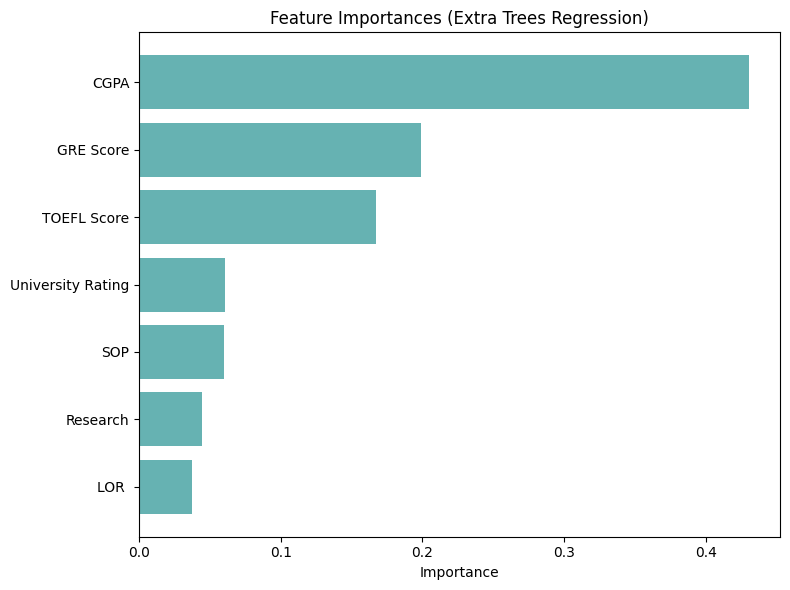

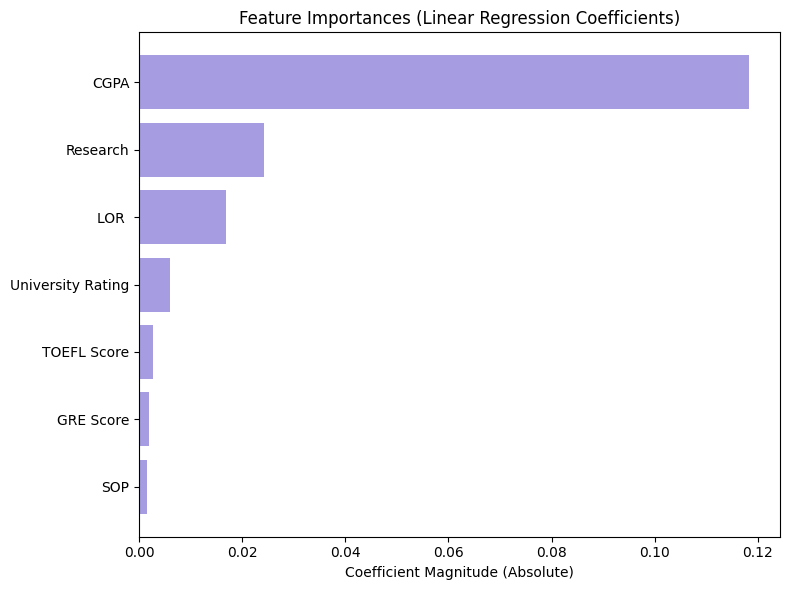

In [ ]:
# Initialize and fit Extra Trees model
classifier = ExtraTreesRegressor()
classifier.fit(X, y)

# Create a DataFrame for feature importances
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = feature_names
importance_frame['Importance'] = classifier.feature_importances_

# Sort by importance
importance_frame = importance_frame.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_frame['Features'], importance_frame['Importance'], align='center', alpha=0.6, color='teal')
plt.xlabel('Importance')
plt.title('Feature Importances (Extra Trees Regression)')
plt.tight_layout()
plt.show()

# Initialize and fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Create a DataFrame for feature importance based on absolute coefficient values
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = feature_names
importance_frame['Importance'] = np.abs(model.coef_)  # absolute value of coefficients

# Sort by importance
importance_frame = importance_frame.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_frame['Features'], importance_frame['Importance'], align='center', alpha=0.6, color='slateblue')
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.title('Feature Importances (Linear Regression Coefficients)')
plt.tight_layout()
plt.show()

###Feature Importance Summary

To better understand which features most influence a student's chance of admission, we analyzed feature importance using the best-performing model:

**Extra Trees Regressor**. Extra Trees ranked **CGPA** as the most influential factor, followed closely by **GRE Score** and **TOEFL Score**. These findings align with expectations, as these academic metrics are typically central to graduate admissions decisions. Notably, **Research experience**, despite being a binary variable, also had a meaningful contribution, suggesting that prior research exposure enhances a candidate's profile in the eyes of the model. Features such as **SOP**, **LOR**, and **University Rating** were assigned relatively lower importance. While they may contribute to the prediction, their influence appears minor compared to academic performance indicators.

This reinforces the idea that admission chances in this dataset are driven primarily by measurable academic achievements. The feature importance results support the earlier performance findings — models that are able to capture nuanced feature interactions, like Extra Trees, can leverage the most predictive variables effectively.

##Test it out with ExtraTreesRegressor!

In [ ]:

final_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Refit on the full training data
final_model.fit(X_train, y_train)

feature_names = [
    "GRE Score (out of 340)",
    "TOEFL Score (out of 120)",
    "University Rating (1-5)",
    "Statement of Purpose (SOP, 1-5)",
    "Letter of Recommendation (LOR, 1-5)",
    "CGPA (out of 10)",
    "Research Experience (0 = No, 1 = Yes)"
]

# Collect user input for each feature
user_input = []
print("Enter your information below:")

for label in feature_names:
    val = float(input(f"{label}: "))
    user_input.append(val)

# Convert input to 2D array and normalize
input_array = np.array(user_input).reshape(1, -1)
input_array_normalized = normalize(input_array)

# Make prediction
predicted_prob = final_model.predict(input_array_normalized)[0]
print(f"\nEstimated Chance of Admission: {predicted_prob:.2f}")

Enter your information below:
GRE Score (out of 340): 2
TOEFL Score (out of 120): 2
University Rating (1-5): 2
Statement of Purpose (SOP, 1-5): 2
Letter of Recommendation (LOR, 1-5): 2
CGPA (out of 10): 2
Research Experience (0 = No, 1 = Yes): 2

Estimated Chance of Admission: 0.76


###Final Thoughts and Reflections

Through this project, we learned how to build and evaluate multiple regression models to predict real-world outcomes using structured data. By exploring the **Graduate Admissions 2** dataset, we developed a deeper understanding of how different academic and profile features contribute to the likelihood of graduate school admission.

Key takeaways include:
- **Data preprocessing matters**: Normalization and feature selection significantly influence model performance.
- **Model choice depends on data**: Linear Regression worked well due to strong linear relationships, while tree-based models like Extra Trees offered flexibility and handled feature interactions effectively.
- **Metrics guide improvement**: Using RMSE, MAE, and R² together helped us compare models meaningfully and choose the most appropriate ones.
- **Interpretability is key**: Feature importance plots helped us move beyond accuracy and understand *why* models made the predictions they did.

Overall, this project strengthened our skills in data analysis, regression modeling, and model interpretation — and showed us how machine learning can be used not just for prediction, but for insight.

Names: Julio Beckman and Jay Ortiz-Pimentel
Student ID: jcb26 and jo27
Due Date: 5/1/25
Instructor: Safwat Hamad
##1. Project Title and Introduction
* Title: From Scores to Seats: Predictive Analytics in Admissions

* Summary: This project explores the use of multiple regression-based machine learning models to predict the probability of graduate school admission based on various academic and personal profile features. The goal is to model the likelihood of admission as a continuous probability and understand which features most influence that outcome.

* Motivation: We selected this topic because it reflects a high-stakes, real-world decision-making problem that is relevant to students with aspirations for higher education (such as ourselves) and academic institutions. It also presents a clean, multivariate regression opportunity well-suited for showcasing ML modeling, evaluation, and interpretability—ideal for demonstrating skills in regression techniques and Python-based ML pipelines on our resume. From an institutional standpoint, a predictive admissions model supports strategic decision-making by improving enrollment yield forecasting, optimizing scholarship allocation, and streamlining applicant prioritization. This enables universities to enhance diversity, reduce costs, and make their admissions pipeline more efficient and data-driven.

##2. Dataset Description
* Dataset Name and Source: [Graduate Admission 2 from Kaggle (by mohansacharya)](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data)

* Size and Format: 500 records by 9 columns (CSV Format)

* Target Vriable: Chance of Admit (continuous variable ranging from 0.0 to 1.0)

* Key Features:
  * GRE Score (out of 340)
  * TOEFL Score (out of 120)
  * University Rating (1–5)
  * Statement of Purpose (SOP) Strength (1–5)
  * Letter of Recommendation (LOR) Strength (1–5)
  * CGPA (out of 10)
  * Research Experience (0 or 1)

* License & Ethics:
CC0 license, anonymized data with minimal ethical risk.

## 3. Methodology
* Preproccessing
  * Missing values: The dataset had no missing values.
  * Feature renaming: The target column "Chance of Admit " was cleaned to remove whitespace.
  * Normalization: All features were normalized to improve regression performance and ensure equal scaling.
  * Train/Test Split: The data was split into 80% training and 20% testing using train_test_split.

## 4. Model Evaluation
* Training/Validation Strategy:
    * 80/20 train-test split for evaluating all models
    * Hyperparameter tuning was performed using RandomizedSearchCV with 5-fold cross-validation for all models except Linear Regression (which has no tunable hyperparameters).
* Evaluation Metrics:
  * RMSE (Root Mean Squared Error), for understanding magnitude of prediction errors.
  * MAE (Mean Absolute Error), for assessing average absolute deviation from actual values.
  * R² Score, to measure the proportion of variance explained by the model.
* Performance Comparison:
  * Top Performer: Extra Trees Regressor was the best model after tuning, achieving the highest R² and lowest RMSE/MAE values. Its ensemble nature allowed it to model non-linear feature interactions effectively.
  * Strong Alternatives: Gradient Boosting and Random Forest also performed well after tuning, though with slightly higher error metrics.
  * Underperformers: Support Vector Regressor and K-Neighbors Regressor exhibited relatively high error rates and low R² scores, likely due to poor fit to the structure of the dataset.
  * Hyperparameter tuning significantly improved nearly all models by reducing errors and improving variance explained, highlighting the importance of model optimization.
* Visualizations:
  * Sorted bar charts of RMSE, MAE, and R² helped clearly compare model performance post-tuning.
  * Feature Importance:
    * Extra Trees ranked CGPA, GRE, and TOEFL as the most important features, followed by Research.
    * Linear Regression also emphasized CGPA and GRE, though with less ability to capture interaction effects.

## 5. Conclusion and Discussion
* Key Findings:
  * CGPA was consistently the most predictive feature across all models.
  * GRE and TOEFL scores also played significant roles, reinforcing the dataset's academic focus.
  * Research experience had more influence in tree-based models than in linear models, showing its value in capturing non-linear effects.
  * Extra Trees Regressor delivered the best performance overall, balancing accuracy and interpretability.
* Limitations:
  * The dataset lacked qualitative features such as personal statements, diversity metrics, or recommendation letter content.

  * No hyperparameter tuning or cross-validation was performed — models were used with default settings.

* Future Improvements:
  * Tune model parameters (e.g., SVR kernels, tree depth).

  * Incorporate qualitative or external features for richer prediction.

  * Build an interactive web app for real-time predictions.

## 6. References
* Dataset: Graduate Admission 2 - Kaggle

* Libraries:

  * pandas, numpy, matplotlib, seaborn

  * scikit-learn for modeling, metrics, and preprocessing

  * kagglehub for direct dataset access in Google Colab

* Conceptual References:

  * Scikit-learn documentation: https://scikit-learn.org/
  * Seaborn documentation: https://seaborn.pydata.org/
  * Pandas documentation: https://pandas.pydata.org/docs/
  * Introduction to Machine Learning with Python: A Guide for Data by Andreas C. Müller and Sarah Guido